#                                            HR ANALYTICS PROJECT

In [ ]:
# TASK : Some XYZ company is facing a high attrition rate, therefore we need to analyse the data to address the problems 
# employees are facing so the retention rate is improved. 

## IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD THE DATASET

In [4]:
data=pd.read_csv("HR_ANALYTICS.csv")
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.tail(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [9]:
# Shape of data i.e How many employees are there?

data.shape

(14999, 10)

In [10]:
# Summary of my data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## DATA PREPROCESSING STEPS

In [13]:
# What if we had null values , how to treat them?????????
# Two techniques:
# 1. Drop them ---- dropna()
# 2. Fill them with mean, median, mode---- fillna()
data.isnull()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


In [14]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [18]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [20]:
# Drop duplicate values
data=data.drop_duplicates()

In [21]:
data.shape

(11991, 10)

In [23]:
# Statistical summary of the data

data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Correlation --- relationship between variables
# Types of correlation
# Positive correlation  -----  if one variable is increasing other will also increase
# Negative Correlation ------  if one variable is increasing other will decrease
# Zero Correlation  ------ No effect

# Range of Correlation is always between -1 -- 0 -- +1

In [25]:
data.corr()

# Work Accident--->if the person could not achieve the deadline and couldn't complete the work.
# left-person at notice period

C:\Users\dell\AppData\Local\Temp\ipykernel_29324\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


C:\Users\dell\AppData\Local\Temp\ipykernel_13876\339786952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns. heatmap(data.corr())


<Axes: >

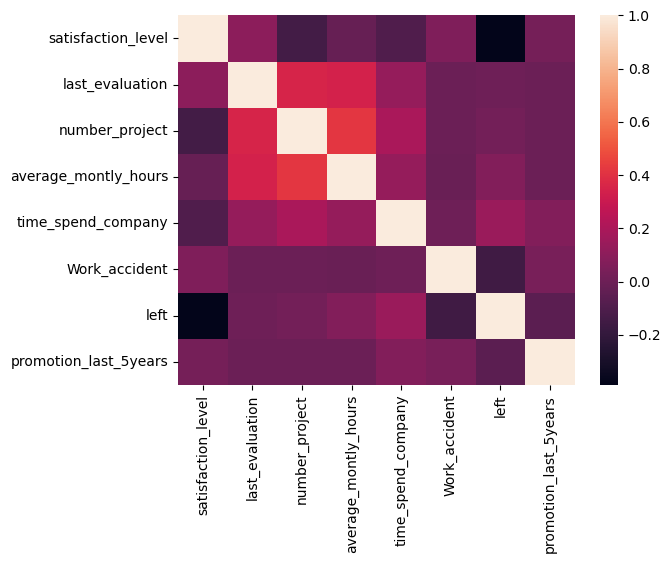

In [3]:
sns. heatmap(data.corr())

C:\Users\dell\AppData\Local\Temp\ipykernel_13876\304439317.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns. heatmap(data.corr(), annot=True, cmap="PiYG")


<Axes: >

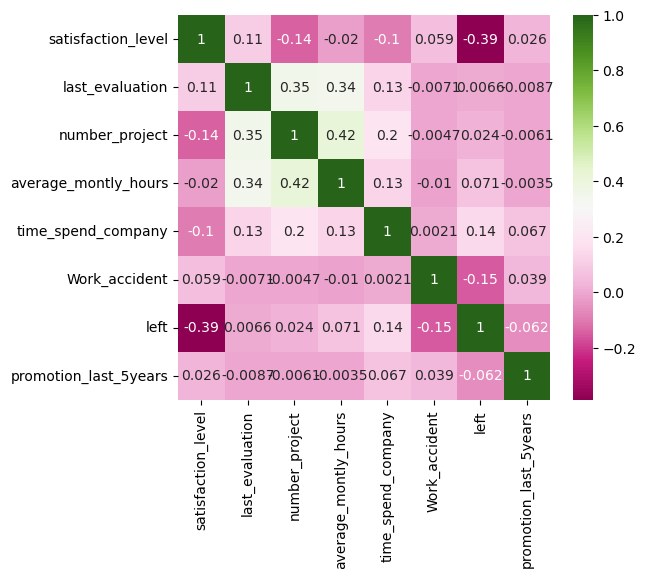

In [5]:
plt.figure(figsize=(6,5))
sns. heatmap(data.corr(), annot=True, cmap="PiYG")

# Analysing the Dataset

In [32]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [33]:
# Total Employees
len(data["left"])   

11991

In [35]:
data["left"].value_counts()

0    10000
1     1991
Name: left, dtype: int64

In [36]:
# Attrition rate- percentage of employees on notice period(left==1)

(1991/11991)*100

16.604119756484028

### Result 1: There is a high attrition rate in the company i.e 16.6%.

In [41]:
# Work Life Balance based on No of Projects.

data["number_project"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: number_project, dtype: int64

### Result 2: Most employees have normal work load.

<Axes: xlabel='number_project', ylabel='count'>

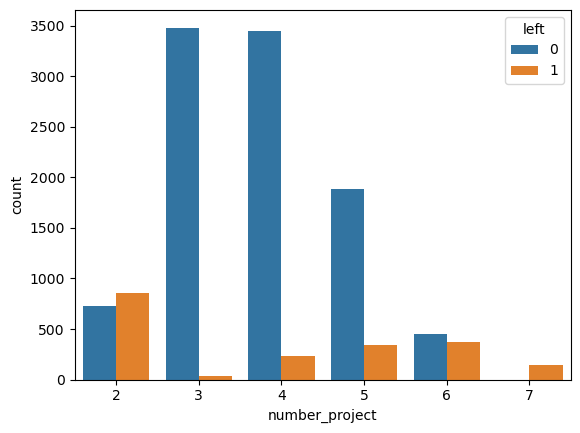

In [45]:
sns.countplot(x="number_project", data=data, hue="left")

In [49]:
data[(data["number_project"]<3) & (data["left"]==1)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low
10,0.45,0.54,2,135,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1993,0.38,0.53,2,140,3,0,1,0,sales,low
1994,0.43,0.54,2,156,3,0,1,0,sales,low
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low


In [55]:
# Employees with Less projects
a=len(data[(data["number_project"]<3) & (data["left"]==1)])
a

857

In [56]:
 # Total employees leaving
b=len(data["left"]==1)
b

11991

In [58]:
# Attrition rate for employees for employees having less projects.

less_projects=(a/b)*100
less_projects

7.147026936869319

In [59]:
# Employees with more projects
m=len(data[(data["number_project"]>5) & (data["left"]==1)])
m

516

In [60]:
# Attrition rate for employees having more no of projects.

more_projects=(m/b)*100
more_projects

4.303227420565424

In [61]:
# Normal work load
n=len(data[(data["number_project"]>=3) &  (data["number_project"]<=5) & (data["left"]==1)])
n

618

In [63]:
# Attrition rate for employees having normal work load.

normal_workload=(n/b)*100
normal_workload

5.1538653990492875

In [67]:
# Attrition rates
less_projects=(a/b)*100
normal_workload=(n/b)*100
more_projects=(m/b)*100

print( "Less projects attrition rate -> " , less_projects)
print( "Normal projects attrition rate -> " , normal_workload)
print( "More projects attrition rate -> " , more_projects)

Less projects attrition rate ->  7.147026936869319
Normal projects attrition rate ->  5.1538653990492875
More projects attrition rate ->  4.303227420565424


### Result 3: Attrition rate is more for employees having less no of projects.

In [9]:
# Let us check based on work accident

<Axes: xlabel='Work_accident', ylabel='count'>

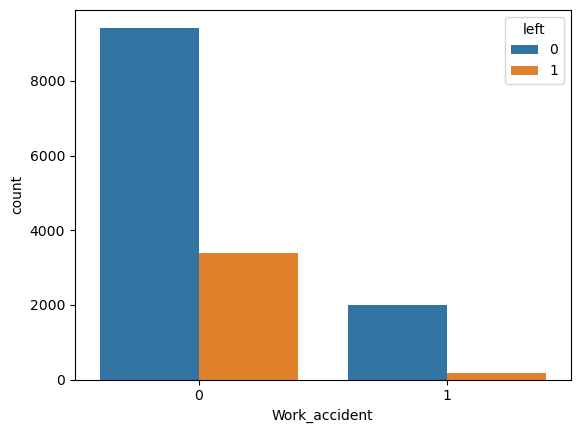

In [15]:
sns.countplot(x="Work_accident", data=data, hue="left")

In [19]:
data["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [56]:
# Attrition rate of employees having Work Accident

len(data[(data["Work_accident"]==1) & (data["left"]==1)])*100/len(data["left"]==1)

1.126741782785519

In [58]:
# Attrition rate of employees having no work accident
len(data[(data["Work_accident"]==0) & (data["left"]==1)])*100/len(data["left"]==1)

22.68151210080672

### Result 3: Best employees are leaving the company more.

In [59]:
# Let's check attrition rate based on Salary

<Axes: xlabel='salary', ylabel='count'>

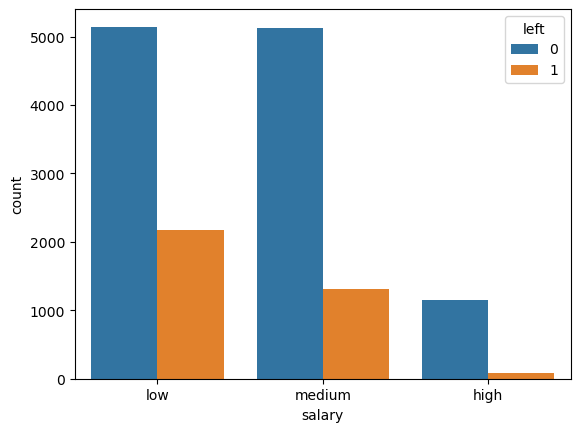

In [60]:
sns.countplot(x="salary", data=data, hue="left")

In [18]:
# Attrition rate of employees having low salary

len(data[(data["salary"]=="low") & (data["left"]==1)])*100/ len(data["left"]==1)

14.48096539769318

In [10]:
# Attrition rate of employees having medium salary

len(data[(data["salary"]=="medium")  & (data["left"]==1)])*100/len(data["left"]==1)

8.780585372358157

In [12]:
# Attrition rate of employees having high salary

len(data[(data["salary"]=="high")  & (data["left"]==1)])*100/ len(data["left"]==1)

0.5467031135409027

### Result 4 : Employees having less salary are leaving more.

In [14]:
# DEPARTMENT WISE

In [23]:
data.rename(columns={"sales":"dept"}, inplace=True)

<Axes: xlabel='dept', ylabel='count'>

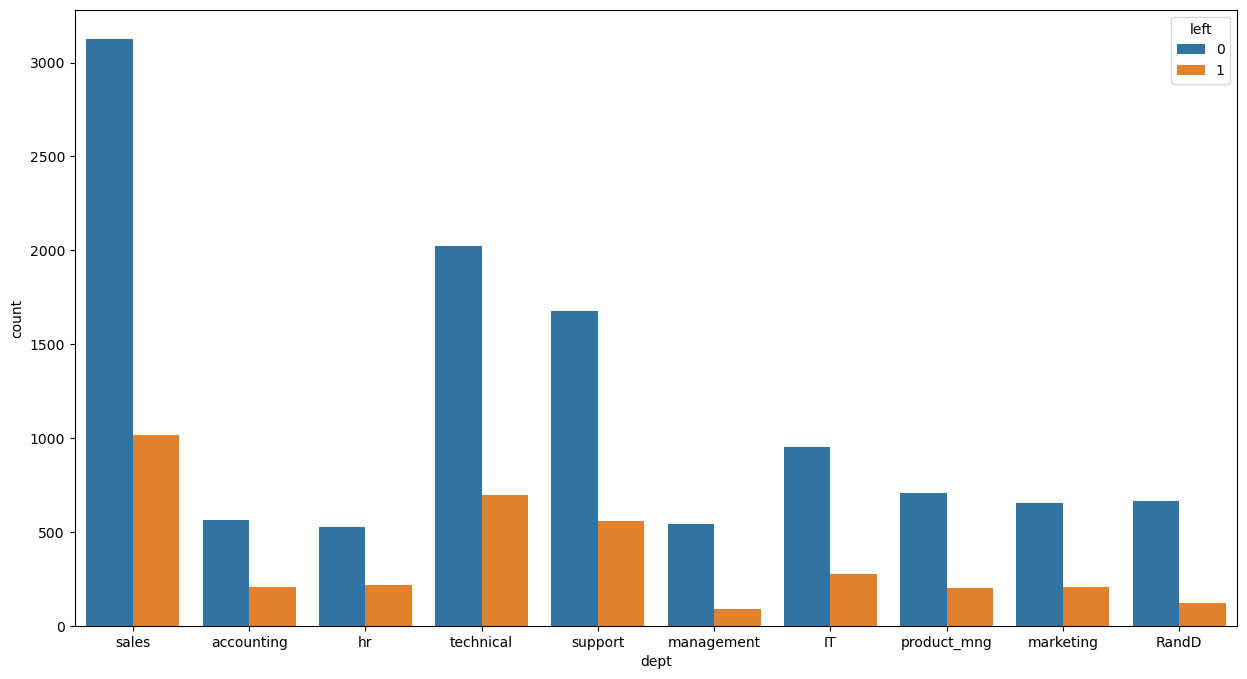

In [26]:
plt.figure(figsize=(15,8))
sns.countplot(x="dept", data=data, hue="left")

### Result 5: Sales, Technical and Support are facing high attrition rates.

### CONCLUSION: 
###    1. There is a high attrition rate in the company i.e 16.6%.
###    2. Most employees have normal work load.
###    3. Best employees are leaving the company more.
###    4. Employees having less salary are leaving more.
###    5. Sales, Technical and Support are facing high attrition rates.